In [9]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
import cv2, os

### Pattern

In [12]:
pattern_npy_dir = './pattern/all_px_grid/grid_npy'
pattern_dir = './pattern/all_px_grid/'

In [ ]:
for i in range(30,31):
    pattern = cv2.imread('./pattern/all_px_grid/grid_%04d.png' %i, -1)
    pattern_npy = np.load('./pattern/all_px_grid/grid_npy/pattern_%04d.npy' %i)

    plt.figure(figsize=(20,15))
    plt.imshow(pattern)
    plt.scatter(pattern_npy[:,0], pattern_npy[:,1], s= 0.2, c = 'red')

### Captured Image (Front spectralon)

In [33]:
front_processed_dir = './front_processed'
wvl = np.arange(450, 660, 50)

In [ ]:
# for i in range(os.listdir(front_processed_dir)):
for i in range(1):
    for w in range(5):
        plt.figure()
        img_dir = os.path.join(front_processed_dir, 'pattern_%03d'%i, '%dnm.png'%wvl[w])
        img = cv2.imread(img_dir)[:,:,::-1]
        plt.imshow(img), plt.title('%dnm' %wvl[w])

### Detected points (Front spectralon)

In [46]:
front_points_dir = './front_points'
wvl = np.arange(450, 660, 50)

In [48]:
for i in range(len(os.listdir(front_points_dir))):
    for w in range(5):
        points = io.loadmat(os.path.join(front_points_dir, 'pattern_%03d'%i, '%dnm_centroid.mat'%wvl[w]))['centers']

In [49]:
points.shape

(32, 2)

### Captured Image with detected points

In [ ]:
# for i in range(os.listdir(front_processed_dir)):
for i in range(1):
    for w in range(5):
        plt.figure(figsize=(20, 15))
        img_dir = os.path.join(front_processed_dir, 'pattern_%03d'%i, '%dnm.png'%wvl[w])
        img = cv2.imread(img_dir)[:,:,::-1]
        plt.imshow(img), plt.title('%dnm' %wvl[w])
        
        points = io.loadmat(os.path.join(front_points_dir, 'pattern_%03d'%i, '%dnm_centroid.mat'%wvl[w]))['centers']
        plt.scatter(points[:,0]-1, points[:,1]-1, s= 0.2, c = 'red')

### Correspondence

#### pattern

In [54]:
i = 0 
pattern_npy = np.load('./pattern/all_px_grid/grid_npy/pattern_%04d.npy' %i)

In [56]:
len(pattern_npy)

36

#### detected points

In [57]:
i = 0
w = 0
points = io.loadmat(os.path.join(front_points_dir, 'pattern_%03d'%i, '%dnm_centroid.mat'%wvl[w]))['centers']

In [58]:
len(points)

45

#### processed image (intensity comparison)

In [66]:
i, w = 0, 0
img_dir = os.path.join(front_processed_dir, 'pattern_%03d'%i, '%dnm.png'%wvl[w])
img = cv2.imread(img_dir)[:,:,::-1]

# image의 평균
img_m = img.mean(axis = 2)

In [67]:
# sort with x-axis to find avg of each cols
sorted_idx = np.argsort(points[...,0], axis = 0)
x_sort = np.take_along_axis(points[...,0], sorted_idx, axis = 0)
y_sort = np.take_along_axis(points[...,1], sorted_idx, axis = 0)
points[...,0], points[...,1] = x_sort, y_sort

In [70]:
points

array([[  2.28317264, 182.22018979],
       [  2.64089893, 164.51614779],
       [  4.05907006, 147.55089224],
       [  4.08752405, 200.1551452 ],
       [  5.33458226, 130.47759157],
       [  7.05068161, 113.33126459],
       [  8.4385314 ,  96.62972309],
       [  9.55994549,  79.91629261],
       [ 10.88240181,  63.39181842],
       [ 12.36655454,  46.62477064],
       [ 13.64689721,  30.05394035],
       [ 15.05448356,  13.48589114],
       [397.24368446, 578.97677296],
       [398.47164309, 561.00816218],
       [399.96356448, 543.4922233 ],
       [400.68158107, 524.99067699],
       [402.16406215, 508.0192814 ],
       [403.06301952, 489.90777387],
       [404.47737865, 472.33014018],
       [405.45654544, 454.39963743],
       [406.47822634, 437.0127679 ],
       [407.50448596, 419.11456098],
       [408.38089599, 402.03352542],
       [409.75036065, 385.15378614],
       [411.05537785, 367.59883978],
       [412.45022213, 349.27152281],
       [413.55689092, 333.0381369 ],
 

In [68]:
img_intensity = np.array([img_m[i[1].astype(np.int16) ,i[0].astype(np.int16)] for i in points])

In [73]:
print(img_intensity[:12], ' ' , img_intensity[12:])

[124.         131.         125.          78.33333333 127.
 122.33333333 126.33333333 126.         123.         123.66666667
 121.         119.33333333]   [103.33333333 102.66666667 103.66666667 103.33333333  96.
 103.33333333 101.         103.         103.         103.66666667
  99.33333333 100.33333333 103.33333333 103.         102.
 103.33333333 102.33333333 103.          99.33333333 101.
 103.          95.66666667  93.33333333  98.66666667  95.66666667
  90.          86.          83.          88.66666667  86.
  81.66666667  80.          71.66666667]


In [74]:
img_intensity.mean()

103.11851851851853

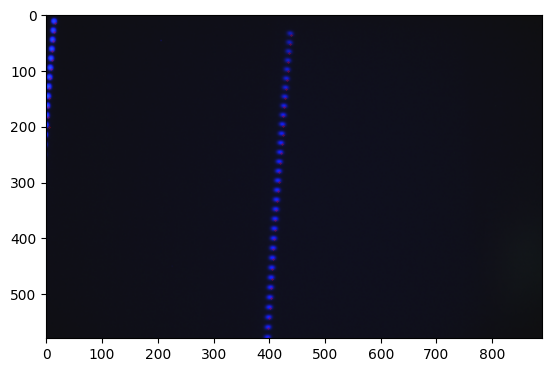

In [64]:
plt.imshow(img)
plt.scatter(points[:,0], points[:,1], s = 0.05, c = 'red')